# Exam Project: The formation of ISIS' Social Media Network
Group members: Zeyu Zhao, Helge Zille, Edith Zink, Sina Smid
# Sentiment Analysis and Classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter

from our_functions import *

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot') # makes the bar charts red on grey background with grid, I think it is nice
default_red = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ss.egb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8']


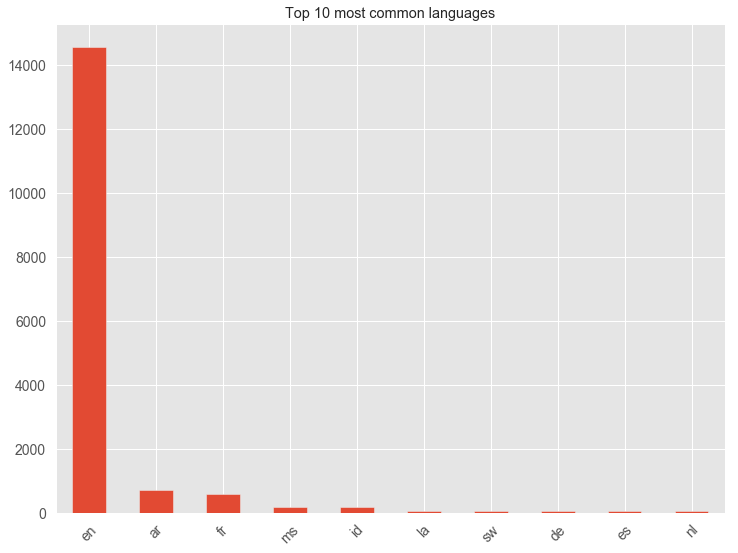

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ss.egb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ss.egb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
%run ./cleaning_18052019.ipynb

In [3]:
from textblob import TextBlob
def get_polarity(s):
     return TextBlob(s).sentiment.polarity
    
def get_subjectivity(s):
    return TextBlob(s).sentiment.subjectivity

# Unedited tweets  --- results are the same when using preprocessed tweets.
df['polarity'] = df['tweets_unedit'].apply(get_polarity)
df['subjectivity'] = df['tweets_unedit'].apply(get_subjectivity)

In [4]:
sub = df[['polarity','subjectivity','date']].groupby(['date']).mean().reset_index()
sub.set_index('date', inplace = True)

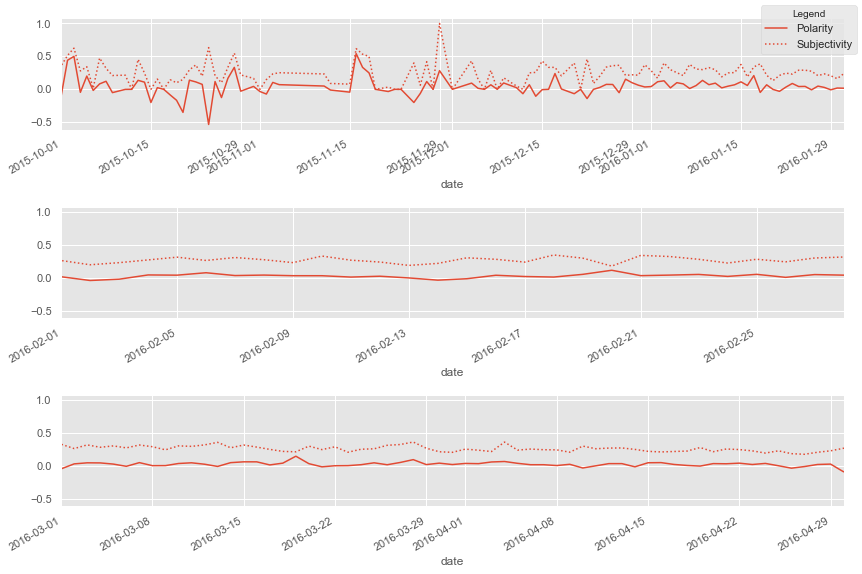

In [5]:
fig = plot_periods(sub['polarity'],sub['subjectivity'])
fig.legend(labels=["Polarity", "Subjectivity"], loc = "upper right", title="Legend")
plt.savefig('figures_exam_project/polarity_subjectivity_timestamp.png')


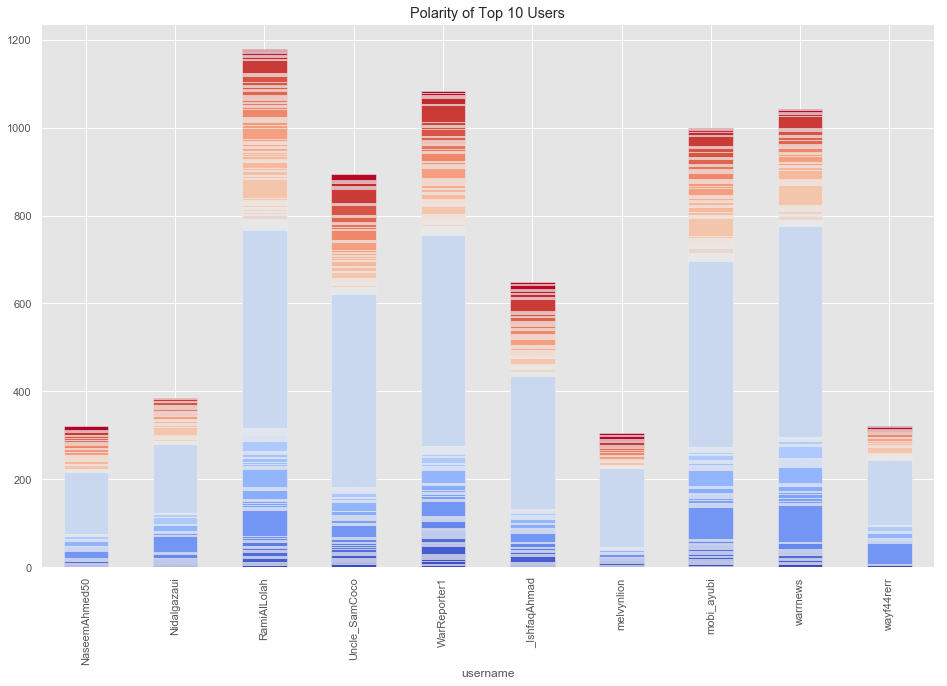

In [6]:
# Sentiments by top 10 users
# Define Top 10 users
top10_users = df[df.username.isin(df.username.value_counts()[:10].keys().tolist())]

# Make graph
pd.crosstab(top10_users.username, top10_users.polarity).plot.bar(stacked=True, figsize=(16, 10), colormap="coolwarm")
plt.legend().set_visible(False)
plt.title("Polarity of Top 10 Users")
plt.savefig('figures_exam_project/polarity_top10.png')

# Text classification

In [7]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

def our_tokenizer(text):
    return text

vec = TfidfVectorizer(tokenizer=our_tokenizer, ngram_range=(1,2), max_df=.5, lowercase=False)
X = vec.fit_transform(df.tweets_lemm.tolist())

terms = vec.get_feature_names()

nmf = NMF(n_components=10).fit(X)
for idx, topic in enumerate(nmf.components_):
    print("Topic #%d:" % idx)
    print(" ".join([terms[i] for i in topic.argsort()[:-10 - 1:-1]]))
    print("")

Topic #0:
kill soldier soldier kill militant claim kill soldier clash injure attack iraqi soldier

Topic #1:
state islamic islamic state fighter state fighter force state force capture fighting via

Topic #2:
isis us assad rebel syrian attack say fight syria muslim

Topic #3:
lol like lol look look know yeah lol yeah lol guess lol seriously lol dying

Topic #4:
army near destroy tank attack target report iraqi position force

Topic #5:
al abu qaeda al qaeda nusra al nusra jabhat sham jabhat al islam

Topic #6:
city work east east city center photo city night center city western west city

Topic #7:
allah may may allah one accept brother allah accept protect allah protect muslim

Topic #8:
ameen inshaallah ameen inshaallah allahuma ameen ameen allahuma allahuma u also ameen u may shaheed

Topic #9:
today airstrikes civilian kill child civilian kill kill today one coalition wounded



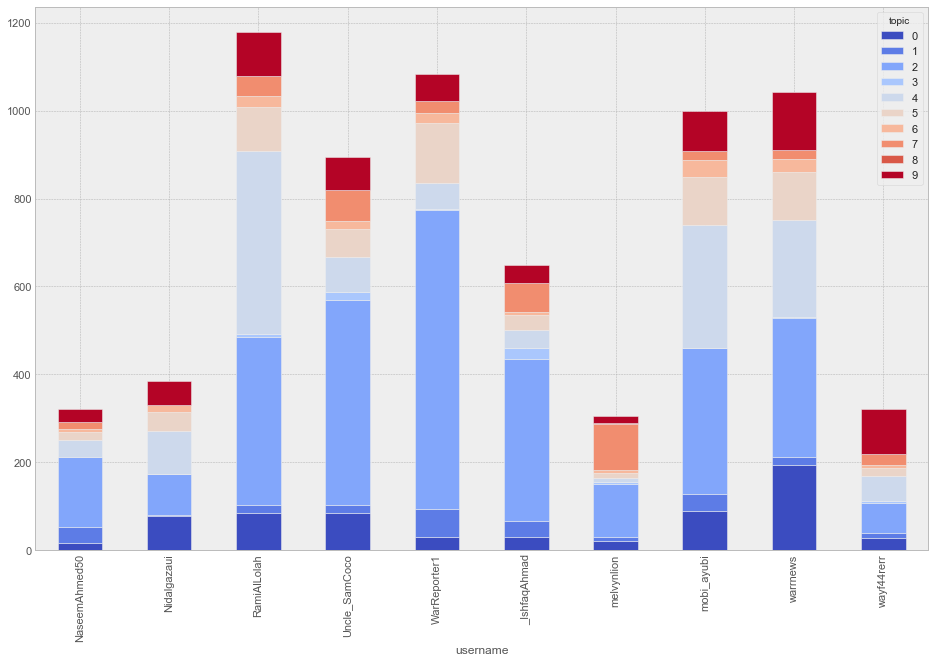

In [8]:
style.use('bmh')

df['topic'] = np.argmax(nmf.transform(vec.transform(df.tweets_lemm.tolist())), axis=1)
top10_users = df[df.username.isin(df.username.value_counts()[:10].keys().tolist())]
pd.crosstab(top10_users.username, top10_users.topic).plot.bar(stacked=True, figsize=(16, 10), colormap="coolwarm")

# LDA: GENSIM

In [9]:
# Build the bigram and trigram models
import gensim
data_words = df.tweets_lemm.tolist()
bigram = gensim.models.phrases.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.phrases.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(bigram_mod[data_words[0]])

C:\Users\ss.egb\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\ss.egb\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\Users\ss.egb\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\Users\ss.egb\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster im

C:\Users\ss.egb\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\Users\ss.egb\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\Users\ss.egb\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\Users\ss.egb\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Ph

C:\Users\ss.egb\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\Users\ss.egb\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\Users\ss.egb\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\Users\ss.egb\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Ph

C:\Users\ss.egb\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\Users\ss.egb\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\Users\ss.egb\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\Users\ss.egb\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Ph

C:\Users\ss.egb\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\Users\ss.egb\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\Users\ss.egb\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\Users\ss.egb\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Ph

C:\Users\ss.egb\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\Users\ss.egb\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\Users\ss.egb\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\Users\ss.egb\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Ph

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['sheikh', 'nasir', 'al', 'wuhayshi', 'ha', 'leader', 'aqap', 'promise', 'victory']


In [10]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

data_words_bigrams = make_bigrams(data_words)

data_words_bigrams

[['sheikh',
  'nasir',
  'al',
  'wuhayshi',
  'ha',
  'leader',
  'aqap',
  'promise',
  'victory'],
 ['aqap',
  'response',
  'sheikh',
  'baghdadis',
  'statement',
  'although',
  'disbeliever',
  'dislike'],
 ['oh', 'murabit'],
 ['collection', 'words', 'u', 'lama', 'regard', 'dawlah'],
 ['aslm', 'please', 'share', 'new', 'account', 'previous', 'one', 'suspend'],
 ['aqap', 'statement', 'regard', 'bless', 'raid', 'france'],
 [],
 ['translate', 'either'],
 ['aslm',
  'anybody',
  'translate',
  'new',
  'jn',
  'video',
  'translate',
  'nobody',
  'else'],
 ['translate', 'inshallah', 'let', 'us', 'knw', 'anybody', 'available', 'sub'],
 ['half', 'way', 'days', 'inshallah', 'busy'],
 ['aslm', 'complete', 'translation', 'exception', 'news'],
 ['report', 'words', 'syrian', 'people', 'complete', 'tomorrow'],
 ['inshallah', 'still', 'finish'],
 ['new', 'links', 'video', 'eng', 'sub', 'path', 'salvation', 'watch'],
 ['video', 'eng', 'subtitle', 'save', 'aleppo', 'watch', 'download'],
 ['pa

In [11]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [12]:
# Build LDA model
# Note: here I take 20 topics, it says that generally we should play around with different number of topics and see which has the best fit
# Please note: this takes long
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [13]:
# Print the Keyword in the 10 topics
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.018*"us" + 0.012*"allah" + 0.010*"say" + 0.010*"people" + 0.008*"syria" + '
  '0.008*"rebel" + 0.008*"pig" + 0.008*"make" + 0.008*"like" + 0.007*"group"'),
 (1,
  '0.033*"isis" + 0.020*"state" + 0.019*"islamic" + 0.012*"take" + '
  '0.011*"control" + 0.009*"video" + 0.009*"muslim" + 0.009*"fight" + '
  '0.009*"one" + 0.008*"new"'),
 (2,
  '0.028*"kill" + 0.026*"al" + 0.016*"army" + 0.015*"soldier" + 0.014*"force" '
  '+ 0.013*"near" + 0.012*"city" + 0.012*"iraqi" + 0.011*"fighter" + '
  '0.010*"attack"')]


In [14]:
from gensim.models import CoherenceModel
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.402021310079574

Coherence Score:  0.2696597198843889


In [15]:
import pyLDAvis
import pyLDAvis.gensim 
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Users\ss.egb\AppData\Local\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.318911 -0.007547       1        1  40.906570
0      0.167304 -0.226221       2        1  31.922935
1      0.151607  0.233768       3        1  27.170494, topic_info=     Category         Freq       Term        Total  loglift  logprob
term                                                                
395   Default  1081.000000       isis  1081.000000  30.0000  30.0000
216   Default  1417.000000       kill  1417.000000  29.0000  29.0000
0     Default  1287.000000         al  1287.000000  28.0000  28.0000
97    Default   652.000000      state   652.000000  27.0000  27.0000
71    Default   639.000000    islamic   639.000000  26.0000  26.0000
46    Default   690.000000         us   690.000000  25.0000  25.0000
192   Default   777.000000       army   777.000000  24.0000  24.0000
210   Default   734.000000    soldier   734.000000  23.0000  23.0000
716   Default   711.000000      force   711.000000  22.0000  22.0000
1122  Default   634.000000       near   634.000000  21.0000  21.0000
556   Default   470.000000      allah   470.000000  20.0000  20.0000
194   Default   595.000000       city   595.000000  19.0000  19.0000
422   Default   576.000000      iraqi   576.000000  18.0000  18.0000
98    Default   383.000000       take   383.000000  17.0000  17.0000
149   Default   538.000000    fighter   538.000000  16.0000  16.0000
87    Default   363.000000    control   363.000000  15.0000  15.0000
138   Default   398.000000        say   398.000000  14.0000  14.0000
228   Default   508.000000     attack   508.000000  13.0000  13.0000
55    Default   390.000000     people   390.000000  12.0000  12.0000
301   Default   489.000000       area   489.000000  11.0000  11.0000
40    Default   308.000000      video   308.000000  10.0000  10.0000
222   Default   296.000000     muslim   296.000000   9.0000   9.0000
269   Default   289.000000      fight   289.000000   8.0000   8.0000
394   Default   424.000000    destroy   424.000000   7.0000   7.0000
26    Default   282.000000        one   282.000000   6.0000   6.0000
233   Default   414.000000      today   414.000000   5.0000   5.0000
518   Default   321.000000      syria   321.000000   4.0000   4.0000
389   Default   310.000000      rebel   310.000000   3.0000   3.0000
362   Default   308.000000        pig   308.000000   2.0000   2.0000
124   Default   300.000000       make   300.000000   1.0000   1.0000
...       ...          ...        ...          ...      ...      ...
40     Topic3   308.223389      video   308.965851   1.3006  -4.6740
222    Topic3   296.031281     muslim   296.753235   1.3006  -4.7143
26     Topic3   282.158508        one   282.874023   1.3005  -4.7623
269    Topic3   288.772644      fight   289.528748   1.3004  -4.7392
25     Topic3   252.569870        new   253.299301   1.3002  -4.8731
400    Topic3   210.480576       iraq   211.235275   1.2995  -5.0554
1318   Topic3   203.128693      saudi   203.866104   1.2994  -5.0910
345    Topic3   196.716003       show   197.486786   1.2991  -5.1231
629    Topic3   176.109741     medium   176.809280   1.2991  -5.2337
1690   Topic3   177.360550        ypg   178.108292   1.2988  -5.2266
305    Topic3   170.225601        day   170.952545   1.2988  -5.2677
1637   Topic3   184.004059        pro   184.809464   1.2987  -5.1899
477    Topic3   164.589844       time   165.326660   1.2986  -5.3014
536    Topic3   158.390411  terrorist   159.114395   1.2985  -5.3397
447    Topic3   156.645889     turkey   157.369171   1.2984  -5.3508
1100   Topic3   159.638168       shia   160.394989   1.2983  -5.3319
1032   Topic3   155.494217      right   156.255844   1.2982  -5.3582
1306   Topic3   154.215408        map   154.996567   1.2980  -5.3665
1727   Topic3   135.812973  supporter   136.541702   1.2977  -5.4935
217    Topic3   128.644104      sunni   129.344574   1.2976  -5.5478
397    Topic3   217.515778    

In [22]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words, start=2, limit=40, step=6)

NameError: name 'gensim' is not defined

# LDA: SCIKIT LEARN

https://www.machinelearningplus.com/nlp/topic-modeling-python-sklearn-examples/
In addition to previous cleaning:
- word has to occur min 3 times
- at least three characters
- 50000 max number of uniq words

In [23]:
df.head()

,index,name,username,description,location,followers,numberstatuses,time,tweets,date,...,retweeted_from,mentions,hashtags,words_in_tweet,tweets_nsw,tweets_stem,tweets_lemm,polarity,subjectivity,topic
0,3,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:37:00,"SHEIKH NASIR AL WUHAYSHI (HA), LEADER OF AQAP...",2015-01-06,...,NaN,[],[],"[sheikh, nasir, al, wuhayshi, ha, leader, of, ...","[sheikh, nasir, al, wuhayshi, ha, leader, aqap...","[sheikh, nasir, al, wuhayshi, ha, leader, aqap...","[sheikh, nasir, al, wuhayshi, ha, leader, aqap...",0.000000,0.000000,5
1,4,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:45:00,AQAP: 'RESPONSE TO SHEIKH BAGHDADIS STATEMENT...,2015-01-06,...,NaN,[],[],"[aqap, response, to, sheikh, baghdadis, statem...","[aqap, response, sheikh, baghdadis, statement,...","[aqap, respons, sheikh, baghdadi, statement, a...","[aqap, response, sheikh, baghdadis, statement,...",0.000000,0.000000,5
2,6,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 22:04:00,OH MURABIT! :,2015-01-06,...,NaN,[],[],"[oh, murabit]","[oh, murabit]","[oh, murabit]","[oh, murabit]",0.000000,0.000000,2
3,7,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 22:06:00,'A COLLECTION OF THE WORDS OF THE U'LAMA REGA...,2015-01-06,...,NaN,[],[],"[a, collection, of, the, words, of, the, u, la...","[collection, words, u, lama, regarding, dawlah]","[collect, word, u, lama, regard, dawlah]","[collection, words, u, lama, regard, dawlah]",0.000000,0.000000,2
4,8,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 22:17:00,Aslm Please share our new account after the pr...,2015-01-06,...,NaN,"[KhalidMaghrebi, seifulmaslul123, CheerLeadUni...",[],"[aslm, please, share, our, new, account, after...","[aslm, please, share, new, account, previous, ...","[aslm, pleas, share, new, account, previou, on...","[aslm, please, share, new, account, previous, ...",-0.015152,0.310606,7


In [18]:
# Run in terminal or command prompt
# python3 -m spacy download en

import numpy as np
import pandas as pd
import re, nltk, spacy, gensim

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\ss.egb\AppData\Local\Continuum\anaconda3\lib\site-packages\thinc\neural\train.py:7: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from .optimizers import Adam, linear_decay


In [30]:
def our_tokenizer(text):
    return text

vec = TfidfVectorizer(tokenizer=our_tokenizer, ngram_range=(1,2), max_df=.5, lowercase=False)
data_vectorized = vec.fit_transform(df.tweets_lemm.tolist())

In [31]:
# Materialize the sparse data
data_dense = data_vectorized.todense()

# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

Sparsicity:  0.01756789013786933 %


In [ ]:
# Build LDA Model
lda_model = LatentDirichletAllocation(n_topics=20,               # Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model)  # Model attributes

C:\Users\ss.egb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [ ]:
LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=-1, n_topics=20, perp_tol=0.1,
             random_state=100, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [ ]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))

# See model parameters
pprint(lda_model.get_params())

In [ ]:
#Be warned, the grid search constructs multiple LDA models for all possible combinations of param values in the param_grid dict. 
# So, this process can consume a lot of time and resources.
# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(data_vectorized)

In [ ]:
GridSearchCV(cv=None, error_score='raise',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1,
             n_topics=None, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_topics': [10, 15, 20, 25, 30], 'learning_decay': [0.5, 0.7, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

In [ ]:
# Get Log Likelyhoods from Grid Search Output
n_topics = [10, 15, 20, 25, 30]
log_likelyhoods_5 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.5]
log_likelyhoods_7 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.7]
log_likelyhoods_9 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.9]

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_5, label='0.5')
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.plot(n_topics, log_likelyhoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()

In [ ]:
# Create Document - Topic Matrix
lda_output = best_lda_model.transform(data_vectorized)

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_topics)]

# index names
docnames = ["Doc" + str(i) for i in range(len(data))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

In [ ]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

In [ ]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(best_lda_model, data_vectorized, vectorizer, mds='tsne')
panel

In [ ]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames

# View
df_topic_keywords.head()

In [ ]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

In [ ]:
# Construct the k-means clusters
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=15, random_state=100).fit_predict(lda_output)

# Build the Singular Value Decomposition(SVD) model
svd_model = TruncatedSVD(n_components=2)  # 2 components
lda_output_svd = svd_model.fit_transform(lda_output)

# X and Y axes of the plot using SVD decomposition
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]

# Weights for the 15 columns of lda_output, for each component
print("Component's weights: \n", np.round(svd_model.components_, 2))

# Percentage of total information in 'lda_output' explained by the two components
print("Perc of Variance Explained: \n", np.round(svd_model.explained_variance_ratio_, 2))

In [ ]:
# Plot
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )